In [215]:
import patchify
import numpy as np
import matplotlib.pyplot as plt

In [216]:
loc_P04 = '/home/saumya/Documents/Flame-diagonis-Dip/Schlieren-Data/German_data/cl19340rcch006/'
# loc_P04 = '/home/saumya/Documents/Schileren_wavelet/Schlieren-Data/P04/'

In [217]:
data = np.load(loc_P04+'cl19340rcch006.npy')

In [218]:
# cropped_data = []
# for k in data:
#     cropped_data.append(k[270:950, 290:720])

In [219]:
# cropped_data[0].shape

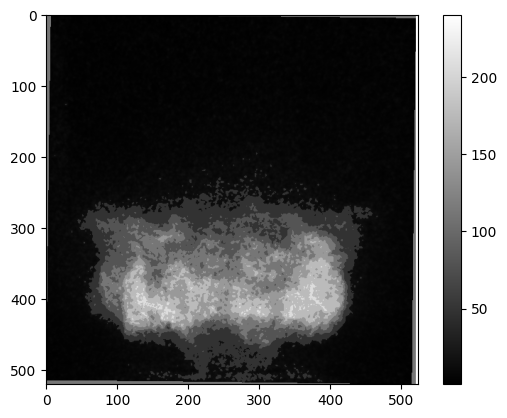

In [220]:
peg = plt.imshow(data[200], cmap='gray')
plt.colorbar(peg)

In [221]:
patches = []
for i in range(data.shape[0]):
    patches.append(patchify.patchify(data[i], (9, 9), 9))
patches = np.array(patches)

In [222]:
patches.shape

(8192, 57, 58, 9, 9)

In [223]:
%who

FuncAnimation	 HTML	 anime	 arrange	 ax	 data	 fft	 fft_filter_1000	 fft_plots	 
fft_ravel	 fft_sig_mean	 fftfreq	 fig	 freq_pre	 frequencies	 i	 idx	 indi_fe	 
j	 k	 loc_P04	 matplotlib	 mean	 mean_adj	 mean_all	 n	 neg	 
np	 patches	 patchify	 peg	 plt	 sampling_rate	 ten_val	 thresh	 x_data	 
x_data_fil	 x_data_sort	 y_data	 y_data_fil	 y_data_sort	 


In [224]:
mean = np.zeros(patches.shape[:3])
# median = np.zeros(patches.shape[:3])
# mode = np.zeros(patches.shape[:3])
for k in range(data.shape[0]):
#     # exec(f'mean_{k} = []')
    for i in range(patches.shape[1]):
        for j in range(patches.shape[2]):
            mean[k][i][j] = np.mean(patches[k][i][j])
            # median[k][i][j] = np.median(patches[k][i][j])
            # mode[k][i][j] = np.mode(patches[k][i][j])

In [225]:
mean.shape

(8192, 57, 58)

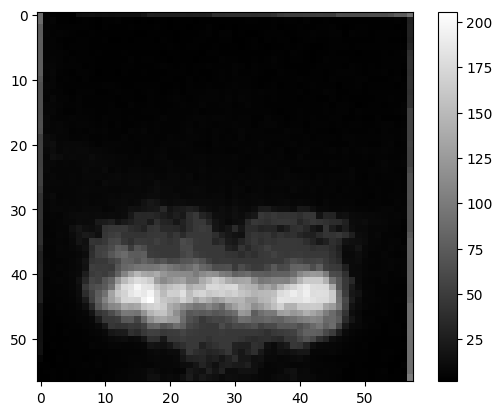

In [226]:
neg = plt.imshow(np.array(mean[100]), cmap='gray')
plt.colorbar(neg)

In [227]:
mean_all = np.mean(mean)
print(mean_all)
mean_adj = mean - mean_all

33.59635495847851


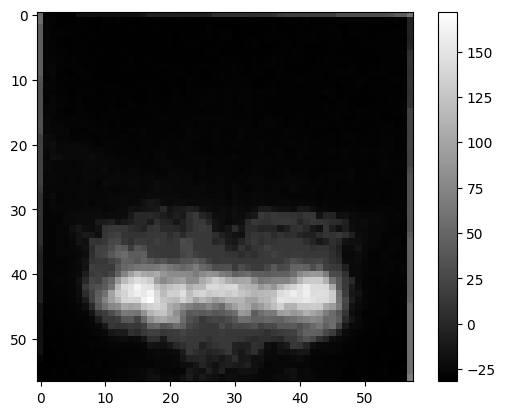

In [228]:
neg = plt.imshow(np.array(mean_adj[100]), cmap='gray')
plt.colorbar(neg)

In [229]:
from scipy.fft import fft, fftfreq
fft_sig_mean = np.zeros_like(mean).astype(np.complex64)
# fft_sig_median = np.zeros_like(median).astype(np.complex64)
# fft_freq = np.zeros_like(mean).astype(np.complex64)
for i in range(mean.shape[1]):
    for j in range(mean.shape[2]):
            fft_sig_mean[:, i, j] = fft(mean_adj[:, i, j])
            # fft_sig_median[:, i, j] = fft(median[:, i, j])
            # fft_freq[:, i, j] = fftfreq(mean[:, i, j])

In [230]:
fft_sig_mean[0,:].shape

(57, 58)

In [231]:
n = fft_sig_mean.shape[0]  # Number of data points
sampling_rate = 10 * 1000 # Adjust this if your data is sampled differently
frequencies = np.fft.fftfreq(n, d=1/sampling_rate)

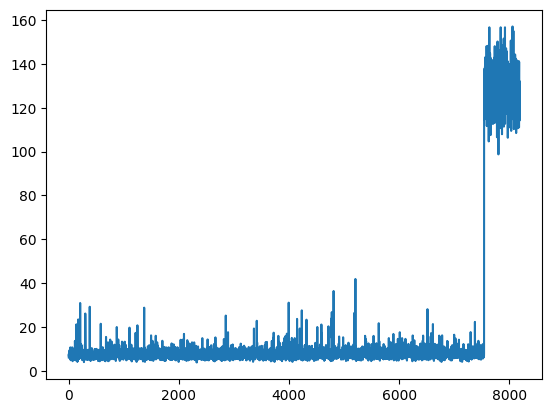

In [232]:
plt.plot(mean[: ,55,20])
# plt.xlim([0,1000])

In [233]:
frequencies.shape

(8192,)

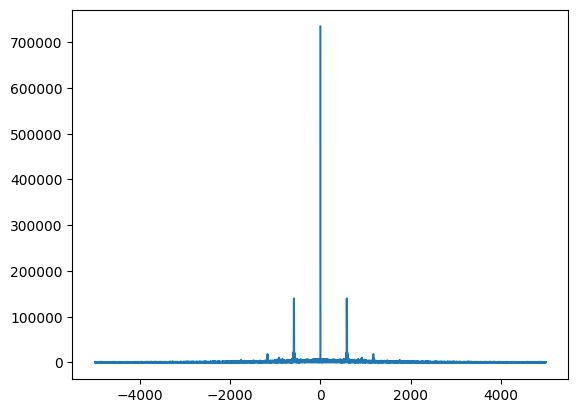

In [234]:
plt.plot(frequencies, np.absolute(fft_sig_mean[: ,44,40]))
# plt.xlim([0,sampling_rate/2])

In [235]:
np.absolute(fft_sig_mean[: ,44,40]).shape

(8192,)

In [236]:
# np.absolute(fft_filter_1000[100:int(frequencies.shape[0]/2)]).shape

(0.0, 5000.0)

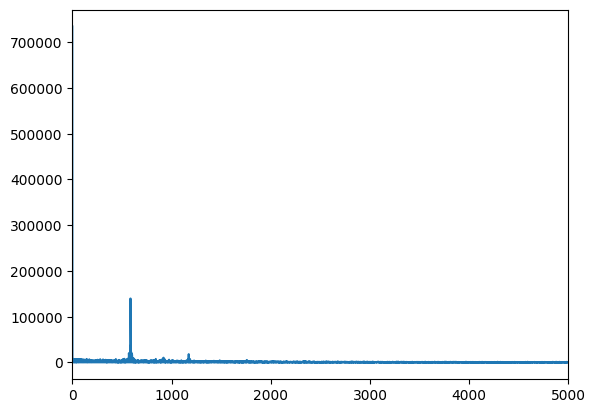

In [237]:
plt.plot(frequencies, np.absolute(fft_sig_mean[: ,44,40]))
plt.xlim([0,sampling_rate/2])

(0.0, 5000.0)

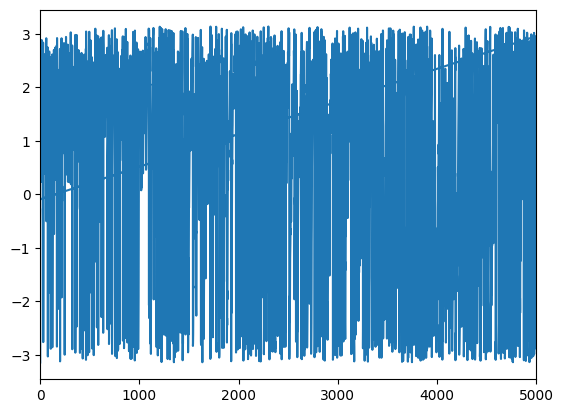

In [238]:
plt.plot(frequencies,np.angle(fft_sig_mean[:,25,33]))
plt.xlim([0,sampling_rate/2])

In [239]:
fft_ravel = np.reshape(fft_sig_mean, [8192, fft_sig_mean.shape[1]*fft_sig_mean.shape[2]])

In [240]:
abs(fft_ravel).max()

832116.4

### scalegram

In [241]:
#https://colab.research.google.com/github/jckantor/CBE30338/blob/master/docs/A.03-Animation-in-Jupyter-Notebooks.ipynb

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib

matplotlib.rcParams['animation.embed_limit'] = 2**128
 
def anime(x, sig):
    fig, ax = plt.subplots(1, 1)
    # fig.set_size_inches(5,5)
    
    def animate(i):
        ax.clear()
        # Get the point from the points list at index i
        point = abs(sig[:,i])
        # Plot that point using the x and y coordinates
        ax.plot(x, point, 
                label='original',)
        ax.set_title('Pixel = {0:4d} and its FFT plot'.format(i))
        # Set the x and y axis to display a fixed rangeFrame
        ax.set_xlabel("Freq")
        ax.set_ylabel("abs(FFT)")
        ax.set_xlim([0, sampling_rate/2])
        # ax.set_ylim([0, 5000])
        # ax.set_ylim([0, 1])
    ani = FuncAnimation(fig, animate, frames=sig.shape[1], interval=500, repeat=True)
    plt.close()
    display(HTML(ani.to_jshtml()))

In [242]:
fft_filter_1000 = np.zeros_like(fft_ravel)

for i in range(fft_ravel.shape[1]):
      for k in range(fft_ravel.shape[0]):
        if (abs(fft_ravel[k][i]<10000)):
            fft_filter_1000[k][i] = 0
        else:
            fft_filter_1000[k][i] = fft_ravel[k][i]

In [243]:
fft_filter_1000.shape

(8192, 3306)

In [244]:
# anime(frequencies, fft_filter_1000)

In [245]:
# anime(frequencies, fft_ravel)

In [246]:
# plt.plot(frequencies[abs(fft_filter_1000[:, 2689]))

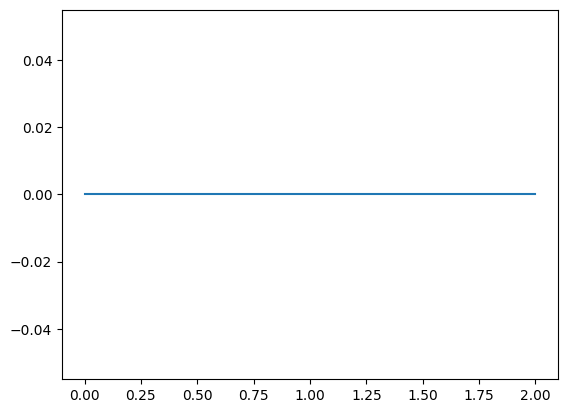

In [247]:
plt.plot(abs(fft_filter_1000[:, 2689])[606:609])

In [248]:
#To save the FFT plots

def fft_plots(loc, name, sig):
    for i in range(sig.shape[1]):
        plt.plot(frequencies, abs(sig[:, i]))
        plt.title('Pixel = {0:4d} and its FFT plot'.format(i))
    # Set the x and y axis to display a fixed rangeFrame
        plt.xlabel("Freq")
        plt.ylabel("abs(FFT)")
        plt.xlim([0, sampling_rate/2])
        plt.ylim([0, 5000])
        exec(f'plt.savefig(loc+name+str({i}))')
        plt.show()

In [249]:
# loc = '/home/saumya/Documents/Schileren_wavelet/Schlieren-Data/FTT_images/1000_filter/'
# name = 'pixel_FFT_1000_'
# fft_plots(loc,name, fft_filter_1000)

In [250]:
# loc = '/home/saumya/Documents/Schileren_wavelet/Schlieren-Data/FTT_images/No_filter/'
# name = 'Pixel_FFT_noFilter_'
# fft_plots(loc,name, fft_ravel)

In [251]:
# from matplotlib.animation import FFMpegWriter
# # Save the animation as an animated GIF
# f = 'FFT_demonstration.mp4'
# writer = FFMpegWriter(fps=60, metadata=dict(artist='Me'), bitrate=1800)
# ani.save(f, writer=writer)

In [252]:
fft_filter_1000[0:int(frequencies.shape[0]/2)].shape

(4096, 3306)

In [253]:
freq_pre = np.zeros_like(fft_filter_1000, dtype=np.float32)
for i in range(fft_filter_1000.shape[0]):
    for j in range(fft_filter_1000.shape[1]):
        if fft_filter_1000[i][j] == 0:
            freq_pre[i][j] = 0
        else:
            freq_pre[i][j] = frequencies[i]

In [254]:
freq_pre.shape

(8192, 3306)

In [255]:
# Creating a tensor of values for bar graph plotting
def ten_val(x_data):
    x_data_ten = []
    for i in range(x_data.shape[0]):
        k = []
        for j in range(x_data.shape[1]):
            if x_data[i][j] != 0:
                k.append(x_data[i][j])
        x_data_ten.append(k)
    return x_data_ten

In [256]:
# Preparing data for the 3D plotting 

x_data = freq_pre[0:int(freq_pre.shape[0]/2)].astype(np.int32)
y_data = np.absolute(fft_filter_1000[0:int(freq_pre.shape[0]/2),:]).astype(np.int32)

print(x_data.shape, y_data.shape)

(4096, 3306) (4096, 3306)


In [257]:
# freq_pre[:freq_pre.shape[0]/2].shape

In [258]:
for i in range(x_data.shape[0]):
    for j in range(x_data.shape[1]):
        if x_data[i][j] == 0:
            y_data[i][j] = 0

In [ ]:
def arrange(x, y):
    x_data_sort = np.zeros_like(x)
    y_data_sort = np.zeros_like(y)
    for i in range(x.shape[1]):
        idx = np.argsort(y[:,i])
        x_data_sort[:, i] = x[:, i][idx]
        y_data_sort[:, i] = y[:, i][idx]
    return(x_data_sort, y_data_sort)

In [ ]:
x_data_sort, y_data_sort = arrange(x_data, y_data)

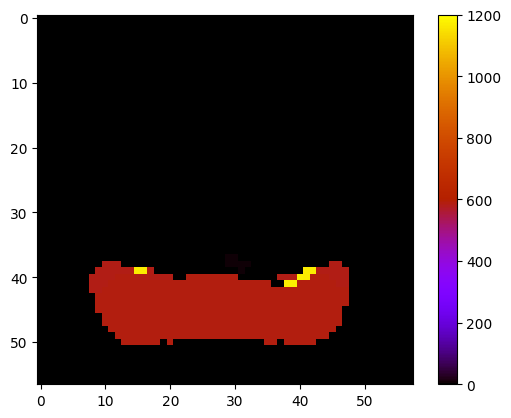

In [ ]:
peg = plt.imshow(x_data_sort[-1, :].reshape(fft_sig_mean[0,:].shape), cmap="gnuplot")
plt.colorbar(peg)
plt.clim(0, 1200)

In [ ]:
np.unique(x_data_sort[-1, :])

array([   1,    2,    3,    4,    6,  585,  587,  588, 1171, 1173],
      dtype=int32)

(0.0, 10.0)

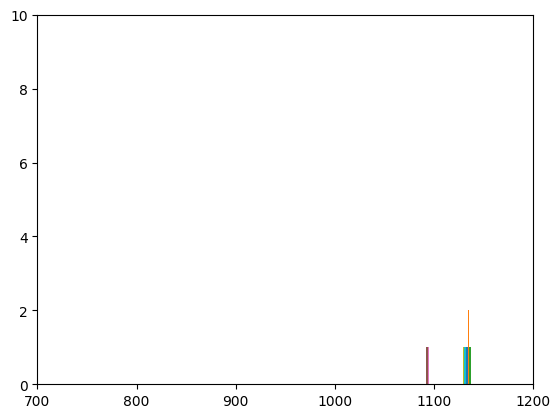

In [ ]:
plt.hist(x_data_sort[-1, :].reshape(fft_sig_mean[0,:].shape))
plt.xlim(xmin=700, xmax=1200)
plt.ylim(ymin=0, ymax=10)

In [ ]:
def thresh (x, y, the):
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            if x[i][j] < the:
                x[i][j] = 0
                y[i][j] = 0
    return(x, y)

In [ ]:
x_data_fil, y_data_fil = thresh(x_data_sort, y_data_sort, 400)

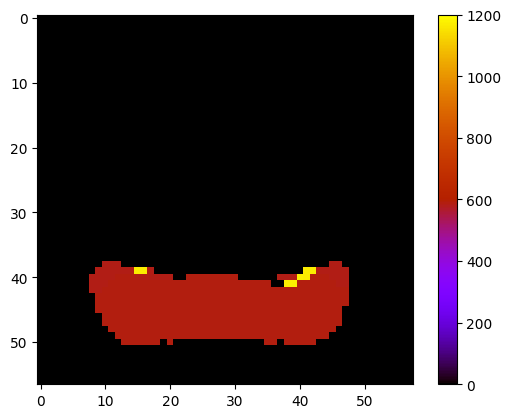

In [ ]:
peg = plt.imshow(x_data_sort[-1, :].reshape(fft_sig_mean[0,:].shape), cmap="gnuplot")
plt.colorbar(peg)
plt.clim(0, 1200)

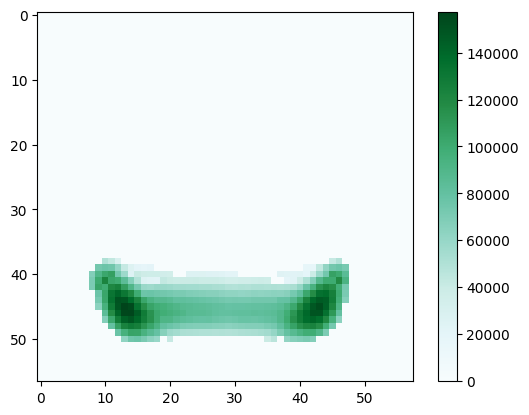

In [ ]:
peg = plt.imshow(y_data_fil[-1, :].reshape(fft_sig_mean[0,:].shape), cmap="BuGn")
plt.colorbar(peg)

In [ ]:
def indi_fe(x, y):
    a = []
    b = []
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            if x[i][j] != 0:
                a.append(x[i][j])
                b.append(y[i][j])
    a = np.array(a)
    b = np.array(b)
    return a, b

In [ ]:
a, b = indi_fe(x_dat_fil, y_dat_fil)

NameError: name 'x_dat_fil' is not defined

In [ ]:
plt.bar(a, b)

NameError: name 'a' is not defined

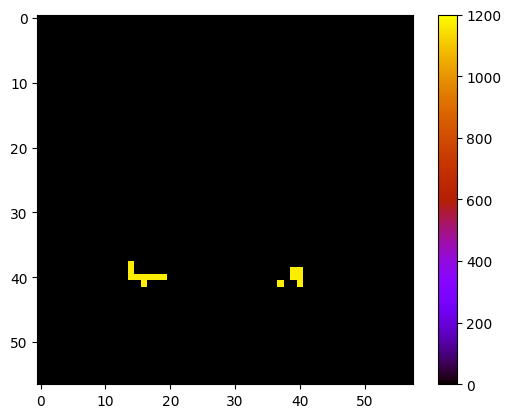

In [ ]:
peg = plt.imshow(x_data_sort[-2, :].reshape(fft_sig_mean[0,:].shape), cmap="gnuplot")
plt.colorbar(peg)
plt.clim(0, 1200)

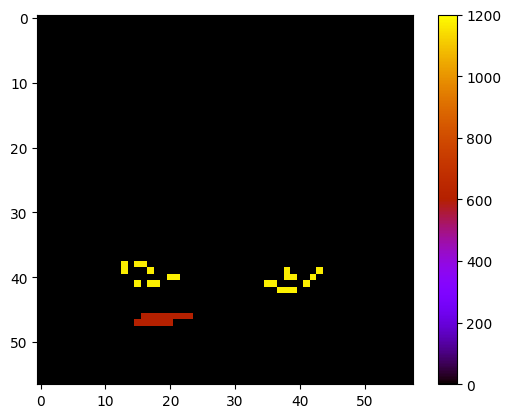

In [ ]:
peg = plt.imshow(x_data_sort[-3, :].reshape(fft_sig_mean[0,:].shape), cmap="gnuplot")
plt.colorbar(peg)
plt.clim(0, 1200)

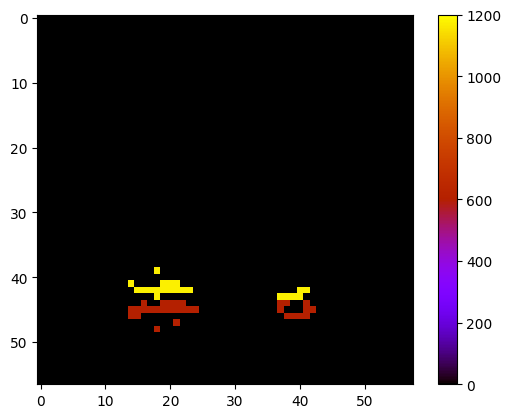

In [ ]:
peg = plt.imshow(x_data_sort[-4, :].reshape(fft_sig_mean[0,:].shape), cmap="gnuplot")
plt.colorbar(peg)
plt.clim(0, 1200)

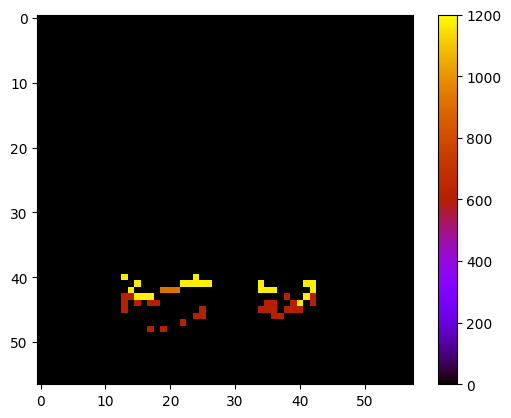

In [ ]:
peg = plt.imshow(x_data_sort[-5, :].reshape(fft_sig_mean[0,:].shape), cmap="gnuplot")
plt.colorbar(peg)
plt.clim(0, 1200)

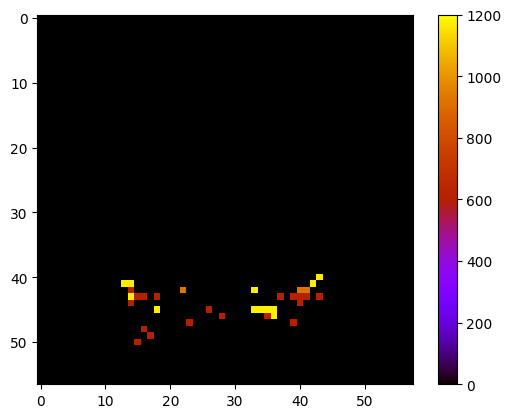

In [ ]:
peg = plt.imshow(x_data_sort[-6, :].reshape(fft_sig_mean[0,:].shape), cmap="gnuplot")
plt.colorbar(peg)
plt.clim(0, 1200)

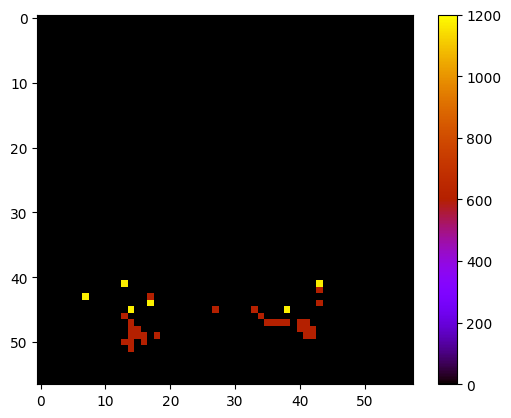

In [ ]:
peg = plt.imshow(x_data_sort[-7, :].reshape(fft_sig_mean[0,:].shape), cmap="gnuplot")
plt.colorbar(peg)
plt.clim(0, 1200)

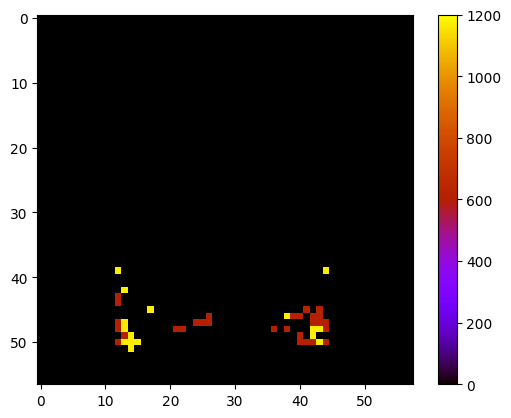

In [ ]:
peg = plt.imshow(x_data_sort[-8, :].reshape(fft_sig_mean[0,:].shape), cmap="gnuplot")
plt.colorbar(peg)
plt.clim(0, 1200)

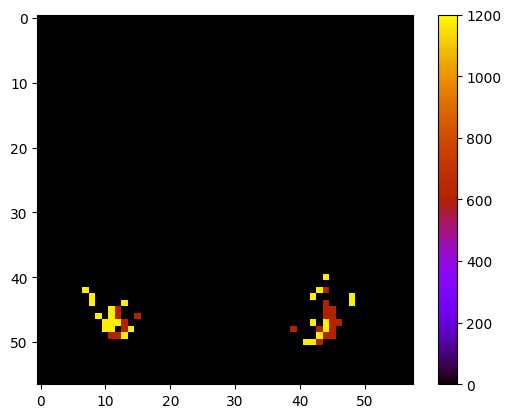

In [ ]:
peg = plt.imshow(x_data_sort[-9, :].reshape(fft_sig_mean[0,:].shape), cmap="gnuplot")
plt.colorbar(peg)
plt.clim(0, 1200)

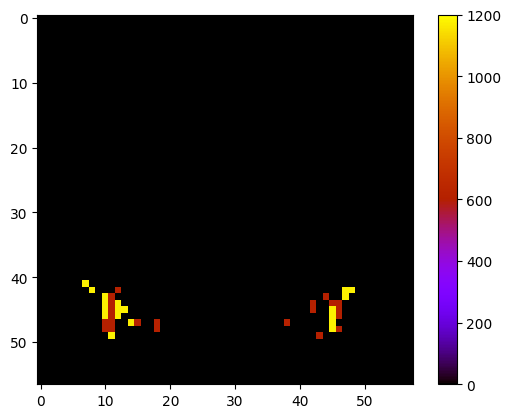

In [ ]:
peg = plt.imshow(x_data_sort[-10, :].reshape(fft_sig_mean[0,:].shape), cmap="gnuplot")
plt.colorbar(peg)
plt.clim(0, 1200)

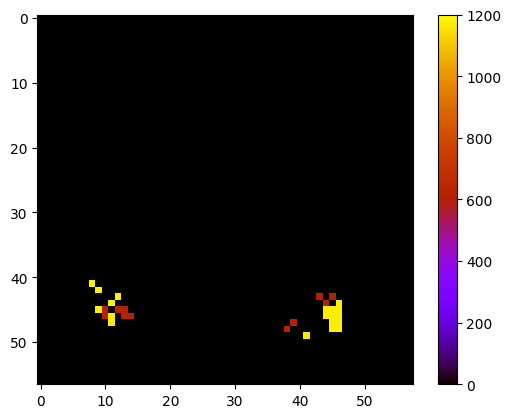

In [ ]:
peg = plt.imshow(x_data_sort[-11, :].reshape(fft_sig_mean[0,:].shape), cmap="gnuplot")
plt.colorbar(peg)
plt.clim(0, 1200)

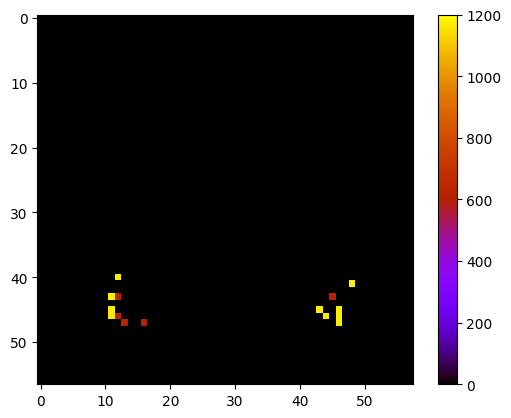

In [ ]:
peg = plt.imshow(x_data_sort[-12, :].reshape(fft_sig_mean[0,:].shape), cmap="gnuplot")
plt.colorbar(peg)
plt.clim(0, 1200)

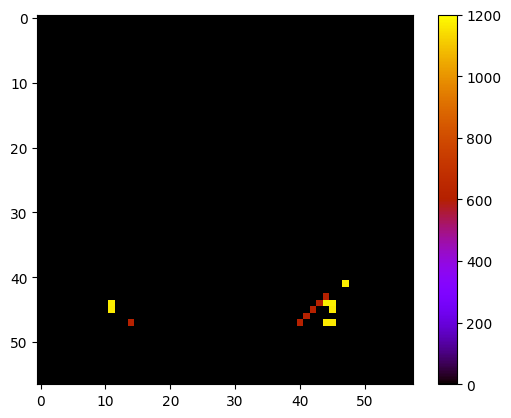

In [ ]:
peg = plt.imshow(x_data_sort[-13, :].reshape(fft_sig_mean[0,:].shape), cmap="gnuplot")
plt.colorbar(peg)
plt.clim(0, 1200)

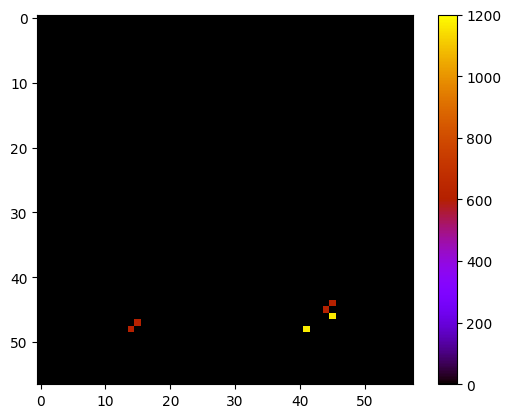

In [ ]:
peg = plt.imshow(x_data_sort[-14, :].reshape(fft_sig_mean[0,:].shape), cmap="gnuplot")
plt.colorbar(peg)
plt.clim(0, 1200)

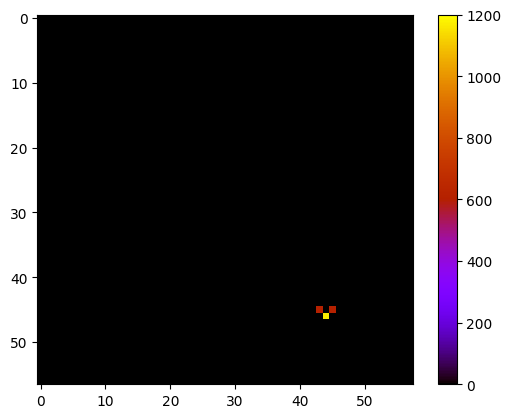

In [ ]:
peg = plt.imshow(x_data_sort[-15, :].reshape(fft_sig_mean[0,:].shape), cmap="gnuplot")
plt.colorbar(peg)
plt.clim(0, 1200)

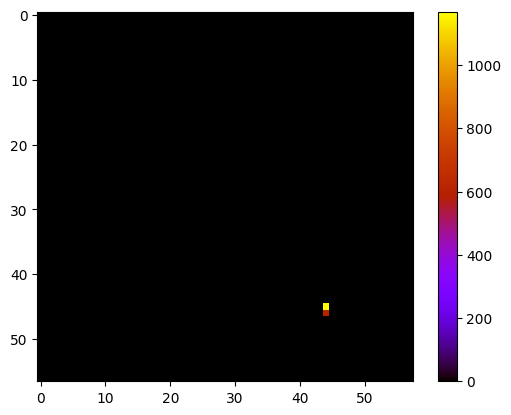

In [ ]:
peg = plt.imshow(x_data_sort[-16, :].reshape(fft_sig_mean[0,:].shape), cmap="gnuplot")
plt.colorbar(peg)

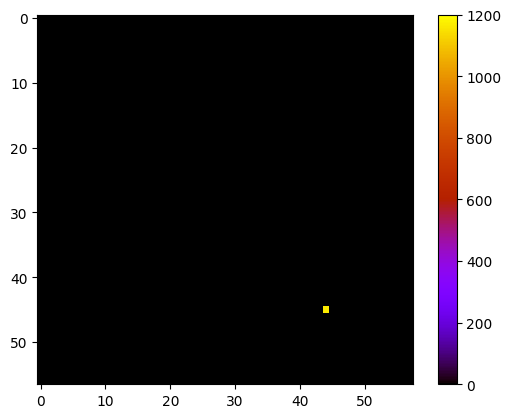

In [ ]:
peg = plt.imshow(x_data_sort[-17, :].reshape(fft_sig_mean[0,:].shape), cmap="gnuplot")
plt.colorbar(peg)
plt.clim(0, 1200)

In [ ]:
# np.unique(x_data_con_sort[455])

In [ ]:
# y_data_con_sort.shape

In [ ]:
y_data.max()

157415